In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from data_transform import DataTransform, DataFrameInfo

In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from data_transform import DataTransform, DataFrameInfo

# Load the cleaned dataset
df = pd.read_csv("loan_payments_cleaned.csv")

# Initialize the DataTransform class to work on the DataFrame
transformer = DataTransform(df)


In [10]:
# Step 2: Overview of the Data
# Display the first few rows of the DataFrame to understand the structure and content
print("\nOverview of Data:")
df.head()


Overview of Data:


,id,loan_amount,term,int_rate,grade,sub_grade,employment_length,home_ownership,annual_inc,verification_status,...,total_rec_late_fee,recoveries,last_payment_date,last_payment_amount,next_payment_date,last_credit_pull_date,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type
0,38676116,8000,36 months,7.49,A,A4,5 years,MORTGAGE,10.736418,Not Verified,...,0.0,0.0,2022-01-01,248.82,2022-02-01,2022-01-01,0.0,5.000000,1,INDIVIDUAL
1,38656203,13200,36 months,6.99,A,A3,9 years,RENT,10.819798,Not Verified,...,0.0,0.0,2022-01-01,407.52,2022-02-01,2022-01-01,0.0,42.253634,1,INDIVIDUAL
2,38656154,16000,36 months,7.49,A,A4,8 years,MORTGAGE,11.210658,Source Verified,...,0.0,0.0,2021-10-01,12850.16,NaN,2021-10-01,0.0,42.253634,1,INDIVIDUAL
3,38656128,15000,36 months,14.31,C,C4,1 year,RENT,10.645449,Source Verified,...,0.0,0.0,2021-06-01,13899.67,NaN,2021-06-01,0.0,42.253634,1,INDIVIDUAL
4,38656121,15000,36 months,6.03,A,A1,10+ years,MORTGAGE,11.884496,Verified,...,0.0,0.0,2022-01-01,456.54,2022-02-01,2022-01-01,0.0,42.253634,1,INDIVIDUAL


In [11]:
# Step 10: Display Data Types and Statistics
# Initialize the DataFrameInfo class to get additional data insights
df_info = DataFrameInfo(transformer.df)
print("\nDataFrame Information:")
df_info.describe_columns()


DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53762 entries, 0 to 53761
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           53762 non-null  int64  
 1   loan_amount                  53762 non-null  int64  
 2   term                         49032 non-null  object 
 3   int_rate                     53762 non-null  float64
 4   grade                        53762 non-null  object 
 5   sub_grade                    53762 non-null  object 
 6   employment_length            51705 non-null  object 
 7   home_ownership               53762 non-null  object 
 8   annual_inc                   53762 non-null  float64
 9   verification_status          53762 non-null  object 
 10  issue_date                   53762 non-null  object 
 11  loan_status                  53762 non-null  object 
 12  payment_plan                 53762 non-null  objec

In [14]:
# Step 11: Query Data to Check Current State of Payments
# Summarize the percentage of loans currently recovered compared to total amount to be paid (including interest)
recovered_amount = transformer.df['last_payment_amount'].sum() + transformer.df['total_rec_int'].sum()
total_amount_due = transformer.df['loan_amount'].sum() + transformer.df['total_rec_int'].sum()
recovered_percentage = (recovered_amount / total_amount_due) * 100

print(f"\nPercentage of Loans Recovered: {recovered_percentage:.2f}%")



Percentage of Loans Recovered: 35.87%


In [17]:
# Step 12: Calculate Amount to be Paid Back in 6 Months (Including Interest)
# Assuming monthly payments are evenly distributed
monthly_payment = transformer.df['last_payment_amount'].mean()  # Use 'last_payment_amount' as a stand-in for 'instalment'
amount_paid_in_6_months = monthly_payment * 6
print(f"\nAmount to be Paid Back in 6 Months (Including Interest): {amount_paid_in_6_months:.2f}")


Amount to be Paid Back in 6 Months (Including Interest): 18762.51


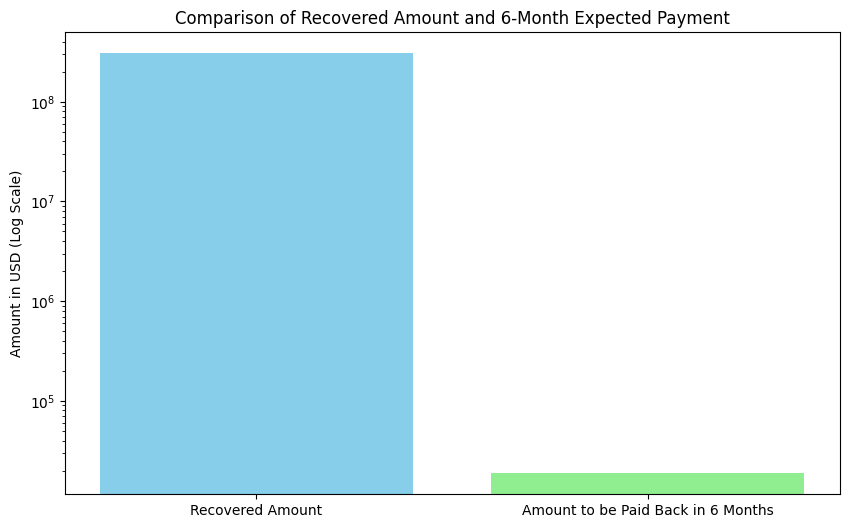

In [20]:
plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=['skyblue', 'lightgreen'])
plt.ylabel('Amount in USD (Log Scale)')
plt.yscale('log')
plt.title('Comparison of Recovered Amount and 6-Month Expected Payment')
plt.show()


In [21]:
# Step 13: Calculate Percentage of Loans that Have Been a Loss to the Company
# Loans marked as 'Charged Off' are considered a loss
charged_off_loans = transformer.df[transformer.df['loan_status'] == 'Charged Off']
charged_off_percentage = (len(charged_off_loans) / len(transformer.df)) * 100
print(f"\nPercentage of Loans Charged Off: {charged_off_percentage:.2f}%")


Percentage of Loans Charged Off: 10.26%


In [22]:
# Calculate total amount paid towards charged off loans
total_paid_charged_off = charged_off_loans['last_payment_amount'].sum()  # Use 'last_payment_amount' instead of 'total_payment'
print(f"\nTotal Amount Paid Towards Charged Off Loans: {total_paid_charged_off:.2f}")


Total Amount Paid Towards Charged Off Loans: 2236497.43


In [23]:
# Step 14: Calculate Expected Loss of Charged Off Loans
# Calculate the expected loss if these loans had completed their term
expected_revenue_charged_off = charged_off_loans['loan_amount'].sum() + charged_off_loans['total_rec_int'].sum()
loss_due_to_charged_off = expected_revenue_charged_off - total_paid_charged_off
print(f"\nExpected Loss from Charged Off Loans: {loss_due_to_charged_off:.2f}")


Expected Loss from Charged Off Loans: 86002135.29


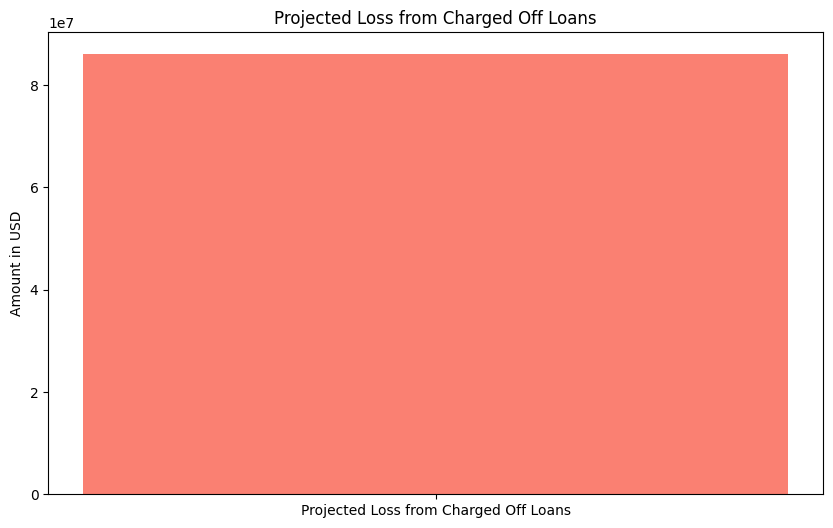

In [24]:
# Visualize the projected loss over the remaining term of charged off loans
plt.figure(figsize=(10, 6))
plt.bar(['Projected Loss from Charged Off Loans'], [loss_due_to_charged_off], color='salmon')
plt.ylabel('Amount in USD')
plt.title('Projected Loss from Charged Off Loans')
plt.show()

In [25]:
# Compare columns that might indicate non-payment
indicator_columns = ['grade', 'purpose', 'home_ownership']

In [29]:
# Added the definition for late_loans here
late_loans = transformer.df[transformer.df['loan_status'] == 'Late']

In [30]:
# Analyze the grade of the loan
charged_off_by_grade = charged_off_loans['grade'].value_counts(normalize=True) * 100
late_loans_by_grade = late_loans['grade'].value_counts(normalize=True) * 100

In [31]:
print("\nPercentage of Charged Off Loans by Grade:")
print(charged_off_by_grade)
print("\nPercentage of Late Loans by Grade:")
print(late_loans_by_grade)


Percentage of Charged Off Loans by Grade:
grade
C    26.763373
B    23.227561
D    21.196736
E    12.837715
A     7.615594
F     6.509519
G     1.849501
Name: proportion, dtype: float64

Percentage of Late Loans by Grade:
Series([], Name: proportion, dtype: float64)


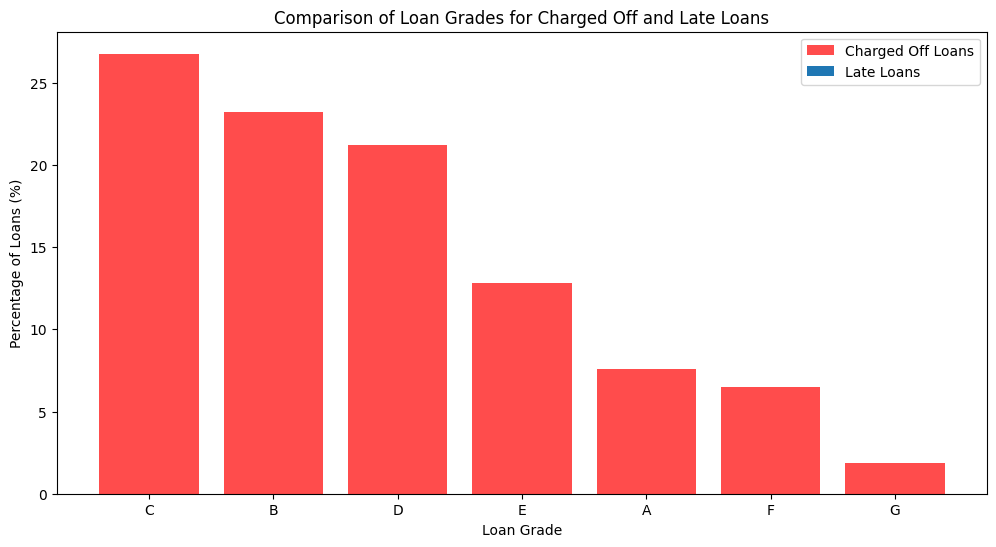

In [32]:
# Visualize the comparison of loan grades
plt.figure(figsize=(12, 6))
plt.bar(charged_off_by_grade.index, charged_off_by_grade.values, alpha=0.7, label='Charged Off Loans', color='red')
plt.bar(late_loans_by_grade.index, late_loans_by_grade.values, alpha=0.7, label='Late Loans', color='orange')
plt.xlabel('Loan Grade')
plt.ylabel('Percentage of Loans (%)')
plt.title('Comparison of Loan Grades for Charged Off and Late Loans')
plt.legend()
plt.show()

In [33]:
# Analyze the purpose of the loan
charged_off_by_purpose = charged_off_loans['purpose'].value_counts(normalize=True) * 100
late_loans_by_purpose = late_loans['purpose'].value_counts(normalize=True) * 10

In [34]:
print("\nPercentage of Charged Off Loans by Purpose:")
print(charged_off_by_purpose)
print("\nPercentage of Late Loans by Purpose:")
print(late_loans_by_purpose)


Percentage of Charged Off Loans by Purpose:
purpose
debt_consolidation    55.285585
credit_card           15.883953
other                  8.522212
small_business         5.421578
home_improvement       4.841342
major_purchase         3.028105
car                    1.631913
medical                1.432457
moving                 1.142339
wedding                0.761559
house                  0.743427
vacation               0.652765
educational            0.435177
renewable_energy       0.217588
Name: proportion, dtype: float64

Percentage of Late Loans by Purpose:
Series([], Name: proportion, dtype: float64)


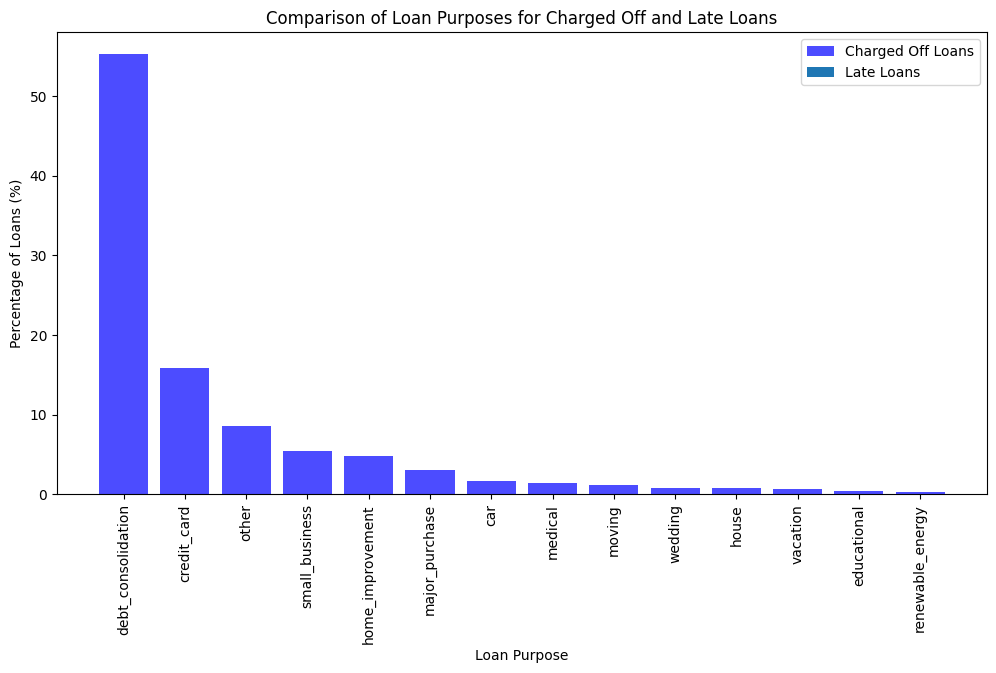

In [35]:
# Visualize the comparison of loan purposes
plt.figure(figsize=(12, 6))
plt.bar(charged_off_by_purpose.index, charged_off_by_purpose.values, alpha=0.7, label='Charged Off Loans', color='blue')
plt.bar(late_loans_by_purpose.index, late_loans_by_purpose.values, alpha=0.7, label='Late Loans', color='green')
plt.xlabel('Loan Purpose')
plt.ylabel('Percentage of Loans (%)')
plt.xticks(rotation=90)
plt.title('Comparison of Loan Purposes for Charged Off and Late Loans')
plt.legend()
plt.show()

In [36]:
# Analyze home ownership
charged_off_by_home_ownership = charged_off_loans['home_ownership'].value_counts(normalize=True) * 100
late_loans_by_home_ownership = late_loans['home_ownership'].value_counts(normalize=True) * 100

In [37]:
print("\nPercentage of Charged Off Loans by Home Ownership:")
print(charged_off_by_home_ownership)
print("\nPercentage of Late Loans by Home Ownership:")
print(late_loans_by_home_ownership)


Percentage of Charged Off Loans by Home Ownership:
home_ownership
RENT        46.636446
MORTGAGE    44.025385
OWN          9.174977
OTHER        0.163191
Name: proportion, dtype: float64

Percentage of Late Loans by Home Ownership:
Series([], Name: proportion, dtype: float64)


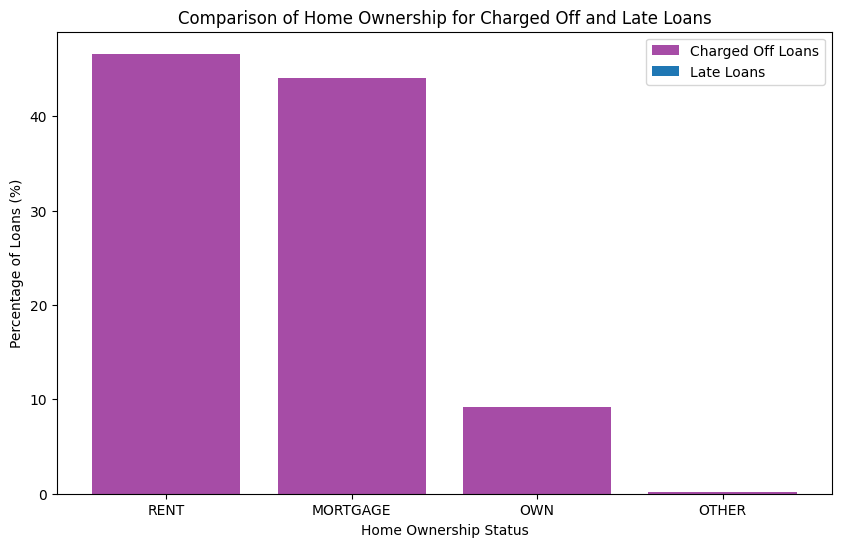

In [38]:
# Visualize the comparison of home ownership
plt.figure(figsize=(10, 6))
plt.bar(charged_off_by_home_ownership.index, charged_off_by_home_ownership.values, alpha=0.7, label='Charged Off Loans', color='purple')
plt.bar(late_loans_by_home_ownership.index, late_loans_by_home_ownership.values, alpha=0.7, label='Late Loans', color='cyan')
plt.xlabel('Home Ownership Status')
plt.ylabel('Percentage of Loans (%)')
plt.title('Comparison of Home Ownership for Charged Off and Late Loans')
plt.legend()
plt.show()
